In [67]:
import pandas as pd
import numpy as np
import datetime
import sklearn


In [68]:
print(sklearn.__version__)

0.21.3


In [69]:
print(pd.__version__)

0.25.3


# Importing Dataset

In [70]:
automobile_df=pd.read_csv(u'datasets/cars.csv',encoding='utf-8')
automobile_df.head(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,bore,stroke
0,18,8,307,130,3504,12,1970-1975,"US,ENGLAND",chevrolet chevelle malibu,2.34,3.56
1,15,8,350,165,3693,11.5,1970-87,US-England,buick skylark 320,2.67,4.78
2,18,8,318,150,3436,11,1970-88,"England,UK",plymouth satellite,2.67,2.34
3,16,?,304,150,3433,12,1970-89,US,amc rebel sst,3.20,3.55
4,17,8,302,140,3449,10.5,1970-90,US,ford torino,2.00,3.55


In [71]:
automobile_df.shape

(398, 11)

In [72]:
automobile_df = automobile_df.replace('?',np.nan)
automobile_df.isna().sum()

mpg             1
cylinders       9
displacement    7
horsepower      8
weight          7
acceleration    2
model year      0
origin          0
car name        0
bore            0
stroke          0
dtype: int64

## Findings:

1. This dataset contains various characteristics of automobile industry
2. Looking at the dataset we can say that it is an ideal candidate for regression model.
3. We can predict mileage of any car using this.
4. Dataset contains 398 rows and 11 columns.
5. As per my intuition i feel that 'bore','stroke','car name' columns are not required in my model.
6. Some columns having missing data which is represented using '?'.
7. We can see that values in 'model year' is not in proper format.
8. origin is also not following proper format.

In [73]:
automobile_df= automobile_df.dropna()
automobile_df.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
bore            0
stroke          0
dtype: int64

In [74]:
automobile_df['model year'].str.isnumeric().value_counts()

True     347
False     20
Name: model year, dtype: int64

In [75]:
automobile_df['model year'].loc[automobile_df['model year'].astype(str).str.isnumeric() == False]

0     1970-1975
1       1970-87
2       1970-88
4       1970-90
5       1970-91
6       1970-92
11    1970-1975
12    1970-1976
13    1970-1977
14    1970-1978
15    1970-1979
16    1970-1980
17    1970-1981
18    1970-1982
19    1970-1983
20    1970-1984
21    1970-1985
22    1970-1986
23    1970-1987
24    1970-1988
Name: model year, dtype: object

In [76]:
extr= automobile_df['model year'].str.extract(r'^(\d{4})',expand=False) 

type(extr)

pandas.core.series.Series

In [77]:
automobile_df['model year'].isna().sum()

0

In [78]:
automobile_df['model year'] = pd.to_numeric(extr)
automobile_df['model year'].head(20)

0     1970
1     1970
2     1970
4     1970
5     1970
6     1970
8     1970
9     1970
10    1970
11    1970
12    1970
13    1970
14    1970
15    1970
16    1970
17    1970
18    1970
19    1970
20    1970
21    1970
Name: model year, dtype: int64

Now as per my intuition it will be good if we add a new feature 'age' based on the 'model year' column so to do that we will subtract the model year from current year.


In [79]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['model year']
automobile_df.drop(['model year'],axis=1,inplace= True)
automobile_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car name,bore,stroke,Age
0,18,8,307,130,3504,12,"US,ENGLAND",chevrolet chevelle malibu,2.34,3.56,49
1,15,8,350,165,3693,11.5,US-England,buick skylark 320,2.67,4.78,49
2,18,8,318,150,3436,11,"England,UK",plymouth satellite,2.67,2.34,49
4,17,8,302,140,3449,10.5,US,ford torino,2.00,3.55,49
5,15,8,429,198,4341,10,US,ford galaxie 500,2.67,3.55,49


In [80]:
automobile_df.drop(['bore','stroke','car name'],axis=1,inplace = True)

In [81]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,Age
260,18.6,6,225,110,3620,18.7,us,41
381,36,4,107,75,2205,14.5,3,37
72,15,8,304,150,3892,12.5,US,47
194,22.5,6,232,90,3085,17.6,1,43
231,15.5,8,400,190,4325,12.2,1,42


In [82]:
automobile_df.dtypes

mpg             object
cylinders       object
displacement    object
horsepower      object
weight          object
acceleration    object
origin          object
Age              int64
dtype: object

Now we will again check our data columns to check any further data cleaning is needed, we can see apart from Age all columns are object type where we know those columns having only numeric values. so to clean datas more precisely we will check each column.

In [83]:
automobile_df['mpg'].isnull().values.any()


False

In [84]:
#automobile_df['mpg'].loc[automobile_df['mpg'].astype(str).str.isnumeric() == False]
automobile_df['mpg'] =automobile_df[['mpg']].apply(pd.to_numeric) 

In [85]:
automobile_df['cylinders'].loc[automobile_df['cylinders'].astype(str).str.isnumeric() == True]

0      8
1      8
2      8
4      8
5      8
      ..
392    4
393    4
394    4
395    4
396    4
Name: cylinders, Length: 367, dtype: object

In [86]:
automobile_df['cylinders'] =automobile_df[['cylinders']].apply(pd.to_numeric) 

In [87]:
convert_dict = {'displacement': int, 
                'horsepower': float,
                'weight': float,
                'accelaration': float
               } 

In [88]:
#automobile_df = automobile_df.astype(convert_dict) 
automobile_df[['displacement', 'horsepower','weight','acceleration']] = automobile_df[['displacement', 'horsepower','weight','acceleration']].apply(pd.to_numeric) 

In [89]:
automobile_df['origin'].unique()

array(['US,ENGLAND', 'US-England', 'England,UK', 'US', 'England,US',
       'GERMANY,Europe', 'EU', 'Europe', 'us', 'IND,asia', '2', '1', '3'],
      dtype=object)

Now we can see only pending column is 'origin' so we will clean 'origin' now, by looking at the values we can say there are few unique values which are distributed in the data and let's assume '1' means 'US', '2' means 'EU' and '3' means 'Asia' as per information given by the domain knowledge expert.

In [90]:
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('US' or 'us'),'US',automobile_df['origin'])
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('us'),'US',automobile_df['origin'])
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('Eu'),'EU',automobile_df['origin'])
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('1'),'US',automobile_df['origin'])
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('2'),'EU',automobile_df['origin'])
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('3'),'Asia',automobile_df['origin'])
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('UK'),'US',automobile_df['origin'])
automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('IND'),'Asia',automobile_df['origin'])

In [99]:
automobile_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,Age
0,18.0,8,307.0,130,3504,12.0,US,49
1,15.0,8,350.0,165,3693,11.5,US,49
2,18.0,8,318.0,150,3436,11.0,US,49
4,17.0,8,302.0,140,3449,10.5,US,49
5,15.0,8,429.0,198,4341,10.0,US,49
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90,2950,17.3,US,37
393,27.0,4,140.0,86,2790,15.6,US,37
394,44.0,4,97.0,52,2130,24.6,EU,37
395,32.0,4,135.0,84,2295,11.6,US,37


In [101]:
automobile_df.to_csv('datasets/cleaned_cars.csv',index=False)

No we are writing the cleaned dataframe to a excel in our local disk, So this notebook has given an idea so far that how to clean your data

So now let's check the relation between features


In [102]:
automobile_df = pd.read_csv('datasets/cleaned_cars.csv')

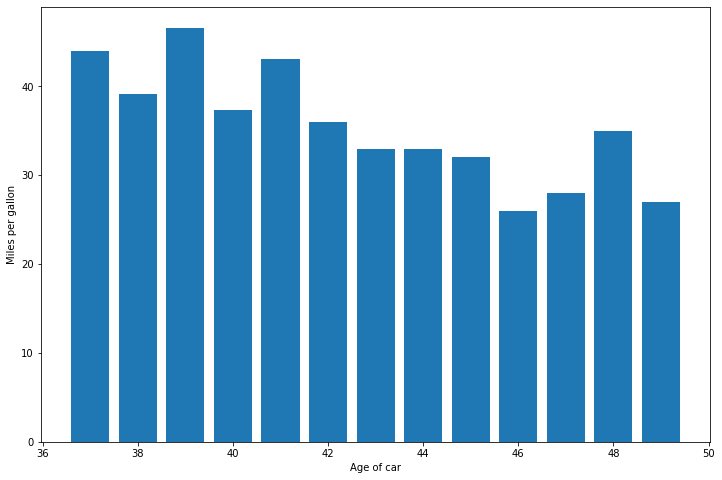

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(automobile_df['Age'],automobile_df['mpg'])
plt.xlabel('Age of car')
plt.ylabel('Miles per gallon')
plt.show()

So from the above plot we can see that these two columns are negatively correlated, when Age is increasing mpg is decreasing.
Let's check correlation between weight and mpg in a scatterplot below.

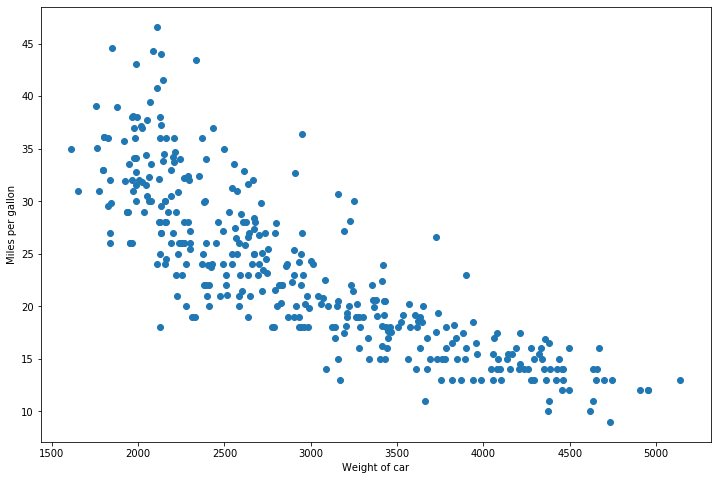

In [104]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['weight'],automobile_df['mpg'])
plt.xlabel('Weight of car')
plt.ylabel('Miles per gallon')
plt.show()

You can see that mpg and weight of the cars are also negatively correlated.

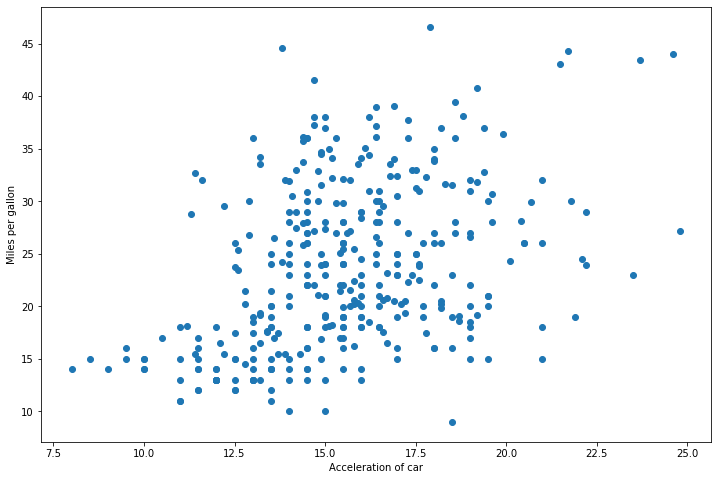

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['acceleration'],automobile_df['mpg'])
plt.xlabel('Acceleration of car')
plt.ylabel('Miles per gallon')
plt.show()

You can see that MPG and Acceleration is positively correlated.
Let's compare three dimensions in one plot.


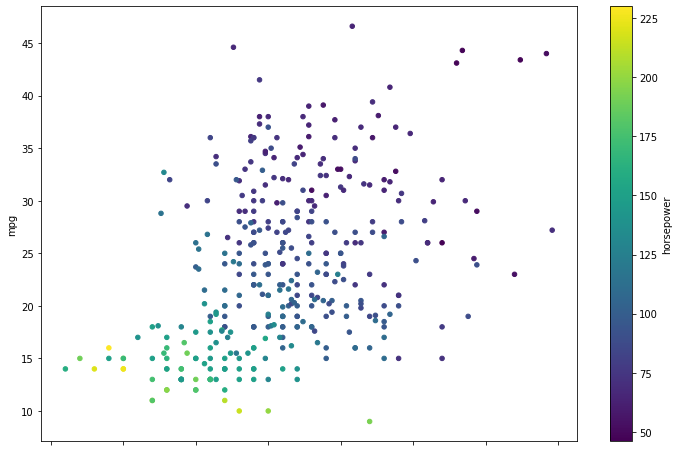

In [106]:
automobile_df.plot.scatter(x='acceleration',y='mpg',c='horsepower',colormap='viridis',figsize=(12,8))

so we can say that cars with higher acceleration having lower horsepower

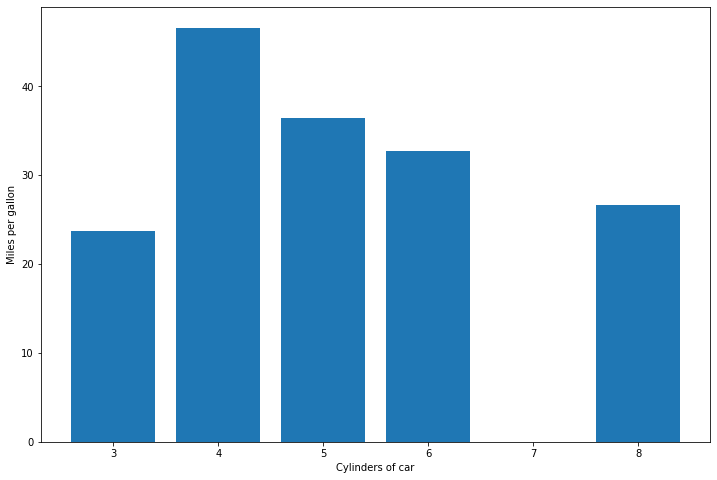

In [107]:
plt.figure(figsize=(12,8))
plt.bar(automobile_df['cylinders'],automobile_df['mpg'])
plt.xlabel('Cylinders of car')
plt.ylabel('Miles per gallon')
plt.show()

so if we look at the plot we can say that relation between Cylinders and mpg is hard to interprete, hence we will remove this column as well.


In [108]:
automobile_df.drop(['cylinders'],axis=1,inplace = True)

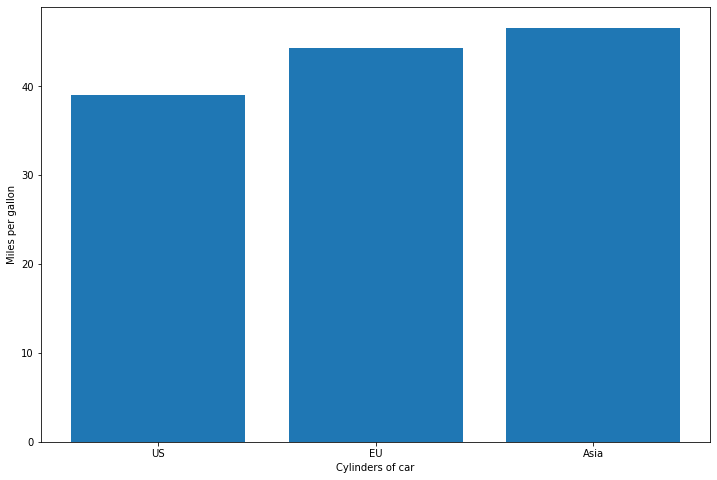

In [109]:
plt.figure(figsize=(12,8))
plt.bar(automobile_df['origin'],automobile_df['mpg'])
plt.xlabel('Cylinders of car')
plt.ylabel('Miles per gallon')
plt.show()

In [110]:
automobile_df.head()

,mpg,displacement,horsepower,weight,acceleration,origin,Age
0,18.0,307.0,130,3504,12.0,US,49
1,15.0,350.0,165,3693,11.5,US,49
2,18.0,318.0,150,3436,11.0,US,49
3,17.0,302.0,140,3449,10.5,US,49
4,15.0,429.0,198,4341,10.0,US,49


In [111]:
cars_corr=automobile_df.corr()
cars_corr

,mpg,displacement,horsepower,weight,acceleration,Age
mpg,1.000000,-0.804296,-0.777642,-0.830702,0.405907,-0.574020
displacement,-0.804296,1.000000,0.891518,0.930437,-0.521733,0.362976
horsepower,-0.777642,0.891518,1.000000,0.862606,-0.673175,0.410110
weight,-0.830702,0.930437,0.862606,1.000000,-0.397605,0.302727
acceleration,0.405907,-0.521733,-0.673175,-0.397605,1.000000,-0.273762
Age,-0.574020,0.362976,0.410110,0.302727,-0.273762,1.000000


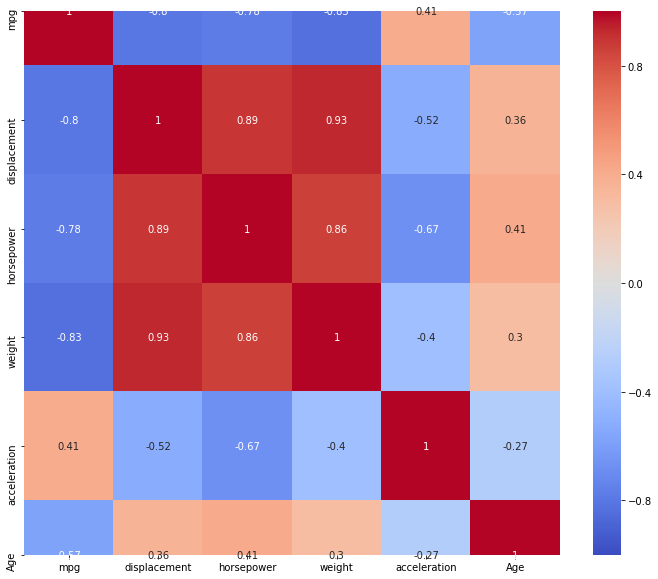

In [119]:
import seaborn as sns

fig,ax=plt.subplots(figsize = (12,10))
sns.heatmap(cars_corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)